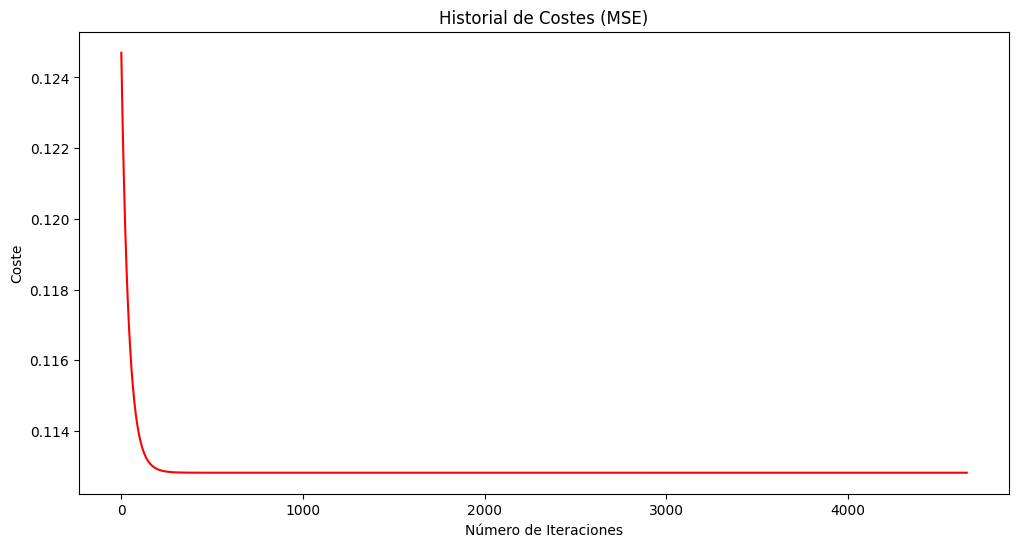

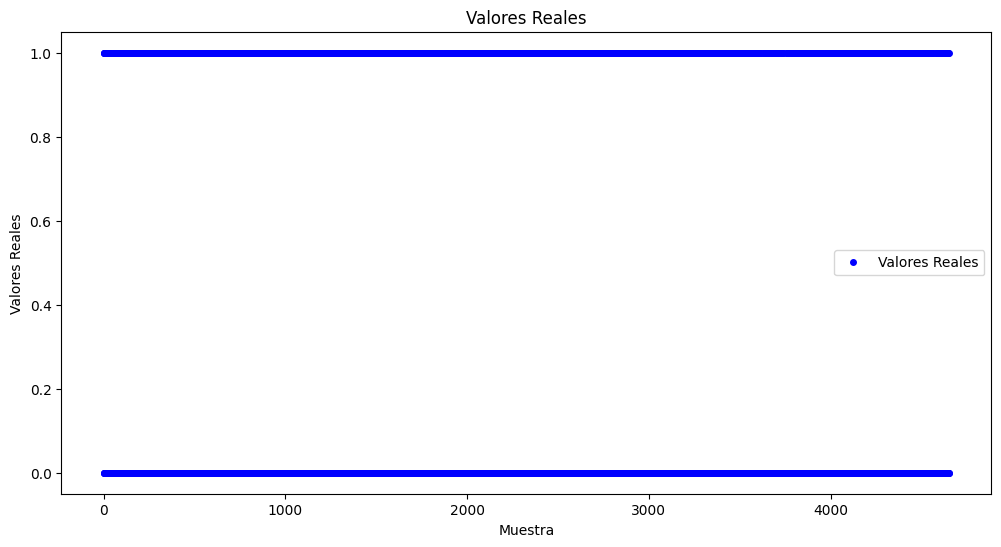

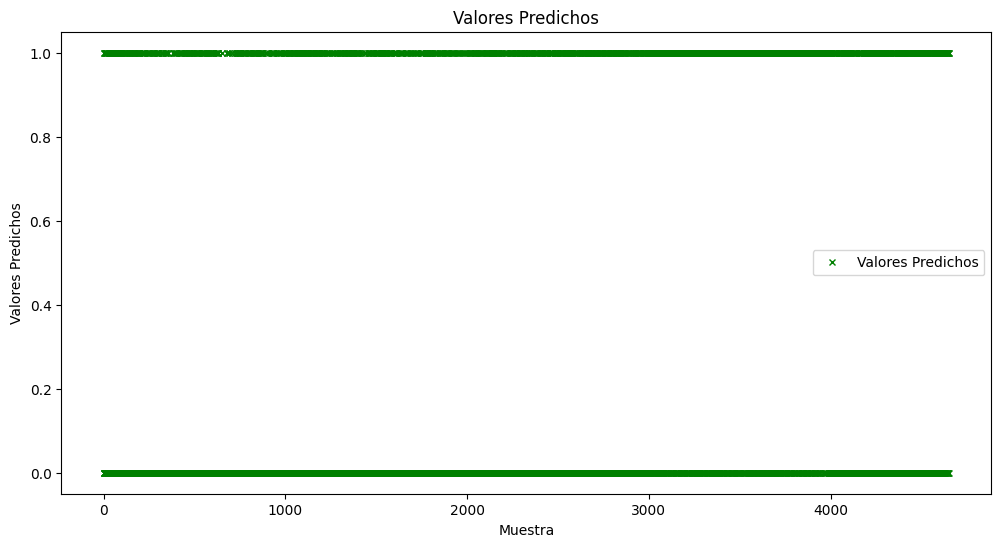

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
data = pd.read_csv("https://raw.githubusercontent.com/AliVGaribay/Practica-8-SSP-SBC/main/Employee.csv")

X = data[["JoiningYear", "PaymentTier", "Age", "ExperienceInCurrentDomain"]].values
y = data["LeaveOrNot"]

# Normalizar las características
X = (X - X.mean()) / X.std()

# Agregar una columna de unos para el término de sesgo
X = np.column_stack((np.ones(X.shape[0]), X))

# Inicializar los parámetros theta
theta = np.zeros(X.shape[1])

# Definir la tasa de aprendizaje y el número de iteraciones
alpha = 0.01
num_iterations = 4654

# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de coste (Error Cuadrático Medio)
def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (1 / (2 * m)) * np.sum((h - y) ** 2)
    return cost

# Gradiente descendente
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        h = sigmoid(X @ theta)
        gradient = (1 / m) * X.T @ (h - y)
        theta -= alpha * gradient
        cost = compute_cost(theta, X, y)
        cost_history.append(cost)

    return theta, cost_history

# Entrenar el modelo
theta, cost_history = gradient_descent(X, y, theta, alpha, num_iterations)

# Realizar predicciones
y_pred = sigmoid(X @ theta) >= 0.344  # Utiliza 0.344 como umbral

# Crear la figura 1: Historial de Costes
plt.figure(figsize=(12, 6))
plt.title("Historial de Costes (MSE)")
plt.xlabel("Número de Iteraciones")
plt.ylabel("Coste")
plt.plot(range(num_iterations), cost_history, color='red')

# Crear la figura 2: Valores Reales
plt.figure(figsize=(12, 6))
plt.title("Valores Reales")
plt.xlabel("Muestra")
plt.ylabel("Valores Reales")
plt.plot(range(len(y)), y, label='Valores Reales', color='blue', marker='o', markersize=4, linestyle='None')
plt.legend()

# Crear la figura 3: Valores Predichos
plt.figure(figsize=(12, 6))
plt.title("Valores Predichos")
plt.xlabel("Muestra")
plt.ylabel("Valores Predichos")
plt.plot(range(len(y)), y_pred, label='Valores Predichos', color='green', marker='x', markersize=4, linestyle='None')
plt.legend()

# Mostrar las figuras
plt.show()